# Military Power Clustering Project
-World military power
Source : globalfirepower.com on 1st may 2020

- https://data.world/vizzup/world-military-power/workspace/file?filename=World+military+power.xlsx


# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
#pd.set_option('display.max_rows', 500)

# Ingest Data  

In [2]:
df = pd.read_excel('World_military_power.xlsx', header=[0, 1])
df.head()

2020 ranking                               Airforce Strength  \
  Military Strength Military Strength Power Index Aircraft Strength   
0       Afghanistan                        1.3444       Afghanistan   
1           Albania                        2.3137           Albania   
2           Algeria                        0.4659           Algeria   
3            Angola                        0.8379            Angola   
4         Argentina                        0.6521         Argentina   

                                                        \
  Aircraft Strength value Fighter/Interceptor Strength   
0                   260.0                  Afghanistan   
1                    19.0                      Albania   
2                   551.0                      Algeria   
3                   295.0                       Angola   
4                   227.0                    Argentina   

                                                               \
  Fighter/Interceptor Strength value Attack Aircraft Strength   
0                                0.0              Afghanistan   
1                                0.0                  Albania   
2                              103.0                  Algeria   
3                               72.0                   Angola   
4                               24.0                Argentina   

                                                                    \
  Attack Aircraft Strength value Transport Aircraft Fleet Strength   
0                           25.0                       Afghanistan   
1                            0.0                           Albania   
2                           22.0                           Algeria   
3                           18.0                            Angola   
4                            7.0                         Argentina   

                                           ...         Manpower  \
  Transport Aircraft Fleet Strength value  ... Total Population   
0                                    30.0  ...      Afghanistan   
1                                     0.0  ...          Albania   
2                                    59.0  ...          Algeria   
3                                    30.0  ...           Angola   
4                                     9.0  ...        Argentina   

                                      Geography                               \
  Total Population value Total Square Land Area Total Square Land Area value   
0            3,49,40,837            Afghanistan                     6,52,230   
1              30,57,220                Albania                      28748.0   
2            4,16,57,488                Algeria                    23,81,741   
3            3,03,55,880                 Angola                    12,46,700   
4            4,46,94,198              Argentina                    27,80,400   

                                                           \
  Total Coastline Coverage Total Coastline Coverage value   
0              Afghanistan                            0.0   
1                  Albania                          362.0   
2                  Algeria                          998.0   
3                   Angola                         1600.0   
4                Argentina                         4989.0   

                                                                               \
  Total Waterway Coverage Total Waterway Coverage value Total Border Coverage   
0             Afghanistan                        1200.0           Afghanistan   
1                 Albania                          41.0               Albania   
2                 Algeria                           0.0               Algeria   
3                  Angola                        1300.0                Angola   
4               Argentina                       11000.0             Argentina   

                               
  Total Border Coverage value  
0                      5987.0  
1                       691.0  


# EDA

In [3]:
def show_null(df):    
    plt.figure(figsize=(4,6))
    sns.displot(
        data=df.isnull().melt(),
        y="variable",
        hue="value",
        multiple="fill",
        height=9.25
    )
    plt.axvline(0.3,color="r");

In [4]:
df.shape

(138, 60)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 60 columns):
 #   Column                                                        Non-Null Count  Dtype  
---  ------                                                        --------------  -----  
 0   (2020 ranking, Military Strength)                             138 non-null    object 
 1   (2020 ranking, Military Strength Power Index)                 138 non-null    float64
 2   (Airforce Strength, Aircraft Strength)                        138 non-null    object 
 3   (Airforce Strength, Aircraft Strength value)                  138 non-null    float64
 4   (Airforce Strength, Fighter/Interceptor Strength)             138 non-null    object 
 5   (Airforce Strength, Fighter/Interceptor Strength value)       138 non-null    float64
 6   (Airforce Strength, Attack Aircraft Strength)                 138 non-null    object 
 7   (Airforce Strength, Attack Aircraft Strength value)           138 non-n

## Implement basic steps to see how your data looks like

In [6]:
df.isnull().sum()

2020 ranking       Military Strength                           0
                   Military Strength Power Index               0
Airforce Strength  Aircraft Strength                           0
                   Aircraft Strength value                     0
                   Fighter/Interceptor Strength                0
                   Fighter/Interceptor Strength value          0
                   Attack Aircraft Strength                    0
                   Attack Aircraft Strength value              0
                   Transport Aircraft Fleet Strength           0
                   Transport Aircraft Fleet Strength value     0
                   Trainer Aircraft Fleet                      0
                   Trainer Aircraft Fleet value                0
                   Helicopter Fleet Strength                   0
                   Helicopter Fleet Strength value             0
                   Attack Helicopter Fleet Strength            0
                   Attack

## Convert multi index columns to one level

In [7]:
df.columns = [ f"{column[0]}"+"_"+f"{column[1]}" for column in df.columns]

In [8]:
df.columns

Index(['2020 ranking_Military Strength',
       '2020 ranking_Military Strength Power Index',
       'Airforce Strength_Aircraft Strength',
       'Airforce Strength_Aircraft Strength value',
       'Airforce Strength_Fighter/Interceptor Strength',
       'Airforce Strength_Fighter/Interceptor Strength value',
       'Airforce Strength_Attack Aircraft Strength',
       'Airforce Strength_Attack Aircraft Strength value',
       'Airforce Strength_Transport Aircraft Fleet Strength',
       'Airforce Strength_Transport Aircraft Fleet Strength value',
       'Airforce Strength_Trainer Aircraft Fleet',
       'Airforce Strength_Trainer Aircraft Fleet value',
       'Airforce Strength_Helicopter Fleet Strength',
       'Airforce Strength_Helicopter Fleet Strength value',
       'Airforce Strength_Attack Helicopter Fleet Strength',
       'Airforce Strength_Attack Helicopter Fleet Strength value',
       'Land Strength_Tank Strength', 'Land Strength_Tank Strength value',
       'Land Strength

## Detect and drop duplicated columns

In [9]:
df.duplicated().sum()

0

## Check for missing values 

<Figure size 288x432 with 0 Axes>

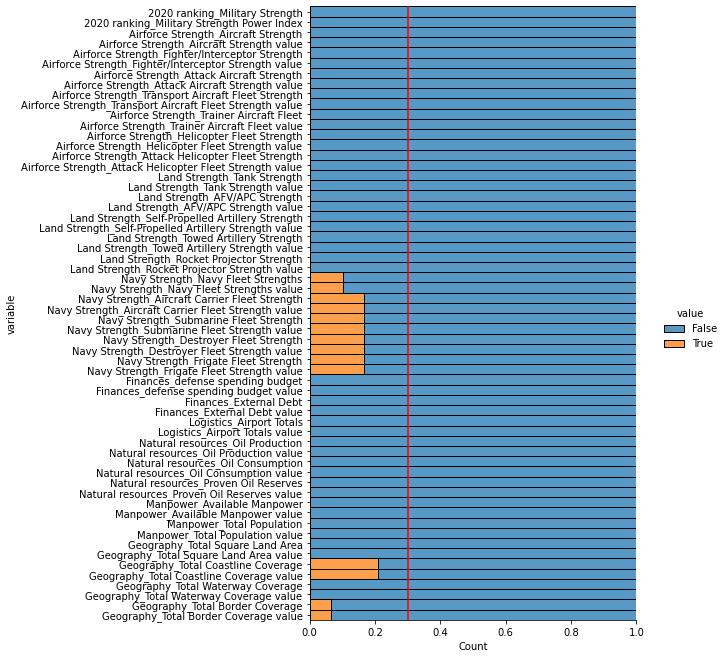

In [10]:
show_null(df)

In [11]:
df.isnull().sum()

2020 ranking_Military Strength                                0
2020 ranking_Military Strength Power Index                    0
Airforce Strength_Aircraft Strength                           0
Airforce Strength_Aircraft Strength value                     0
Airforce Strength_Fighter/Interceptor Strength                0
Airforce Strength_Fighter/Interceptor Strength value          0
Airforce Strength_Attack Aircraft Strength                    0
Airforce Strength_Attack Aircraft Strength value              0
Airforce Strength_Transport Aircraft Fleet Strength           0
Airforce Strength_Transport Aircraft Fleet Strength value     0
Airforce Strength_Trainer Aircraft Fleet                      0
Airforce Strength_Trainer Aircraft Fleet value                0
Airforce Strength_Helicopter Fleet Strength                   0
Airforce Strength_Helicopter Fleet Strength value             0
Airforce Strength_Attack Helicopter Fleet Strength            0
Airforce Strength_Attack Helicopter Flee

## Deal with missing values 
* Hint-1, use wikipedia to fill in missing values ​​comparing with similar countries
* Hint-2, Georeferences of countries can help you

In [12]:
value_cols = [search for search in df.columns if 'value' in search]
value_cols

['Airforce Strength_Aircraft Strength value',
 'Airforce Strength_Fighter/Interceptor Strength value',
 'Airforce Strength_Attack Aircraft Strength value',
 'Airforce Strength_Transport Aircraft Fleet Strength value',
 'Airforce Strength_Trainer Aircraft Fleet value',
 'Airforce Strength_Helicopter Fleet Strength value',
 'Airforce Strength_Attack Helicopter Fleet Strength value',
 'Land Strength_Tank Strength value',
 'Land Strength_AFV/APC Strength value',
 'Land Strength_Self-Propelled Artillery Strength value',
 'Land Strength_Towed Artillery Strength value',
 'Land Strength_Rocket Projector Strength value',
 'Navy Strength_Navy Fleet Strengths value',
 'Navy Strength_Aircraft Carrier Fleet Strength value',
 'Navy Strength_Submarine Fleet Strength value',
 'Navy Strength_Destroyer Fleet Strength value',
 'Navy Strength_Frigate Fleet Strength value',
 'Finances_defense spending budget value',
 'Finances_External Debt value',
 'Logistics_Airport Totals value',
 'Natural resources_Oil

In [13]:
new_df = df[value_cols].copy()

In [14]:
new_df.insert(0,'Country',df['2020 ranking_Military Strength'])

In [15]:
new_df.insert(1,'Military_Strength_Power_Index', df['2020 ranking_Military Strength Power Index'])

In [16]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Country                                                    138 non-null    object 
 1   Military_Strength_Power_Index                              138 non-null    float64
 2   Airforce Strength_Aircraft Strength value                  138 non-null    float64
 3   Airforce Strength_Fighter/Interceptor Strength value       138 non-null    float64
 4   Airforce Strength_Attack Aircraft Strength value           138 non-null    float64
 5   Airforce Strength_Transport Aircraft Fleet Strength value  138 non-null    float64
 6   Airforce Strength_Trainer Aircraft Fleet value             138 non-null    float64
 7   Airforce Strength_Helicopter Fleet Strength value          138 non-null    float64
 8   Airforce S

<Figure size 288x432 with 0 Axes>

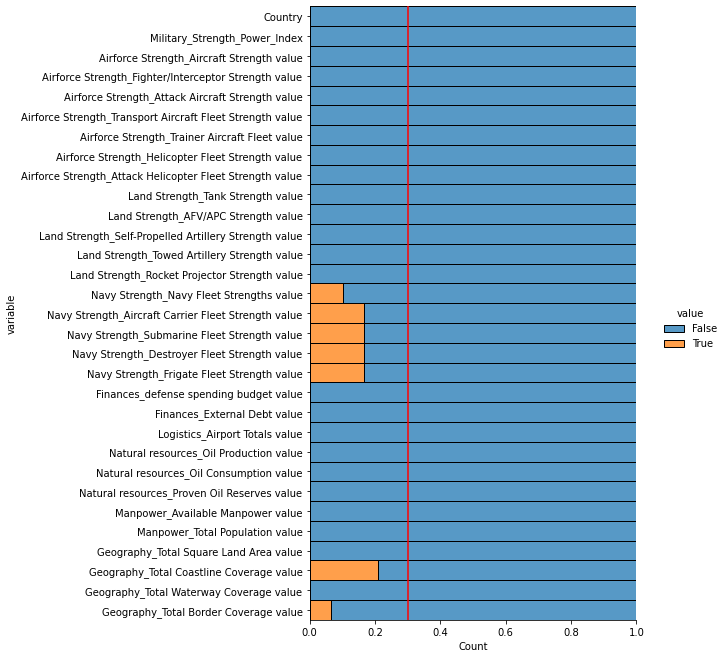

In [17]:
show_null(new_df)

In [18]:
pd.set_option('display.max_columns', 500)


In [19]:
new_df[new_df["Geography_Total Coastline Coverage value"].isnull()][
                                                                    ['Country',
                                                                    'Navy Strength_Navy Fleet Strengths value',
                                                                    'Navy Strength_Aircraft Carrier Fleet Strength value',
                                                                    'Navy Strength_Submarine Fleet Strength value',
                                                                    'Navy Strength_Destroyer Fleet Strength value',
                                                                    'Navy Strength_Frigate Fleet Strength value',
                                                                    'Geography_Total Waterway Coverage value']
                                                                    ]

,Country,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value,Geography_Total Waterway Coverage value
5,Armenia,0.0,NaN,NaN,NaN,NaN,0.0
7,Austria,0.0,NaN,NaN,NaN,NaN,0.0
11,Belarus,0.0,NaN,NaN,NaN,NaN,2500.0
13,Bhutan,0.0,NaN,NaN,NaN,NaN,0.0
14,Bolivia,173.0,0.0,0.0,0.0,0.0,10000.0
16,Botswana,NaN,NaN,NaN,NaN,NaN,0.0
19,Burkina Faso,NaN,NaN,NaN,NaN,NaN,0.0
23,Central African Republic,NaN,NaN,NaN,NaN,NaN,2800.0
24,Chad,NaN,NaN,NaN,NaN,NaN,0.0
30,Czechia,NaN,NaN,NaN,NaN,NaN,664.0


In [20]:
new_df.loc[new_df["Geography_Total Coastline Coverage value"].isnull(),
           [
            'Navy Strength_Navy Fleet Strengths value',
            'Navy Strength_Aircraft Carrier Fleet Strength value',
            'Navy Strength_Submarine Fleet Strength value',
            'Navy Strength_Destroyer Fleet Strength value',
            'Navy Strength_Frigate Fleet Strength value',
            'Geography_Total Waterway Coverage value']
            ] = 0

<Figure size 288x432 with 0 Axes>

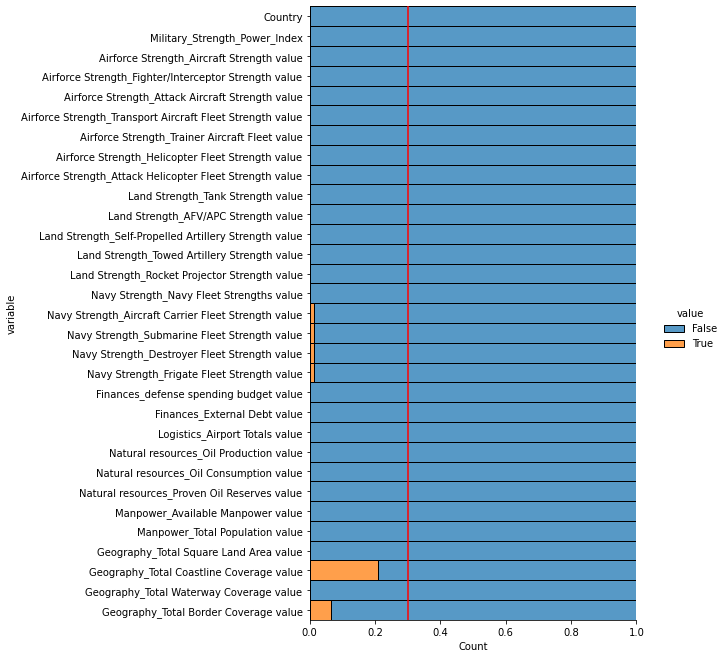

In [21]:
show_null(new_df)

In [22]:
new_df.loc[new_df['Navy Strength_Aircraft Carrier Fleet Strength value'].isnull()|
            new_df['Navy Strength_Submarine Fleet Strength value'].isnull()|
            new_df['Navy Strength_Destroyer Fleet Strength value'].isnull()|
            new_df['Navy Strength_Frigate Fleet Strength value'].isnull()] 

,Country,Military_Strength_Power_Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength value,Land Strength_Towed Artillery Strength value,Land Strength_Rocket Projector Strength value,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget value,Finances_External Debt value,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,Geography_Total Square Land Area value,Geography_Total Coastline Coverage value,Geography_Total Waterway Coverage value,Geography_Total Border Coverage value
110,South Korea,0.1509,1649.0,414.0,71.0,41.0,298.0,803.0,112.0,2614.0,14000.0,3040.0,3854.0,575.0,234.0,NaN,NaN,NaN,NaN,"44,00,00,00,000","3,84,60,00,00,000",111.0,0.0,"28,00,000",0.0,"2,57,09,049","5,14,18,097",99720.0,2413.0,1600.0,237.0
132,Uzbekistan,0.8086,185.0,66.0,20.0,18.0,2.0,79.0,25.0,420.0,1215.0,137.0,0.0,98.0,0.0,NaN,NaN,NaN,NaN,"97,50,00,000","16,90,00,00,000",53.0,46070.0,"1,42,000","59,40,00,000","1,59,12,566","3,00,23,709","4,47,400",420.0,1100.0,6893.0


In [27]:
# There are two countries that have null values in Navy related columns. We want to check for Uzbekistan first.

In [43]:
navy_cols = [col for col in new_df.columns if 'Navy' in col]
navy_cols

['Navy Strength_Navy Fleet Strengths value',
 'Navy Strength_Aircraft Carrier Fleet Strength value',
 'Navy Strength_Submarine Fleet Strength value',
 'Navy Strength_Destroyer Fleet Strength value',
 'Navy Strength_Frigate Fleet Strength value']

In [24]:
new_df.loc[new_df["Country"] == "Uzbekistan", navy_cols] 

,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value
132,0.0,NaN,NaN,NaN,NaN


In [25]:
new_df.loc[new_df["Country"] == "Uzbekistan", navy_cols] = 0

In [26]:
new_df.loc[new_df["Country"] == "Uzbekistan", navy_cols]

,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value
132,0.0,0.0,0.0,0.0,0.0


In [28]:
#Now we check for South Korea

In [29]:
new_df.loc[new_df["Country"] == "South Korea", navy_cols] 

,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value
110,234.0,NaN,NaN,NaN,NaN


In [48]:
new_df.loc[(new_df["Navy Strength_Navy Fleet Strengths value"]>200) & (new_df["Navy Strength_Navy Fleet Strengths value"]<250), ['Country'] + navy_cols] 

,Country,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value
2,Algeria,201.0,0.0,6.0,0.0,5.0
39,Finland,246.0,0.0,0.0,0.0,0.0
55,Italy,249.0,2.0,8.0,4.0,12.0
110,South Korea,234.0,NaN,NaN,NaN,NaN


In [49]:
# All the numbers retrieved from South Korea Navy wikipedia page and open sources.
new_df.loc[new_df["Country"] == "South Korea",'Navy Strength_Aircraft Carrier Fleet Strength value'] = 2
new_df.loc[new_df["Country"] == "South Korea",'Navy Strength_Submarine Fleet Strength value'] = 18
new_df.loc[new_df["Country"] == "South Korea",'Navy Strength_Destroyer Fleet Strength value'] = 12
new_df.loc[new_df["Country"] == "South Korea",'Navy Strength_Frigate Fleet Strength value'] = 12

In [51]:
new_df.loc[new_df["Country"] == "South Korea", navy_cols] 

,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value
110,234.0,2.0,18.0,12.0,12.0


<Figure size 288x432 with 0 Axes>

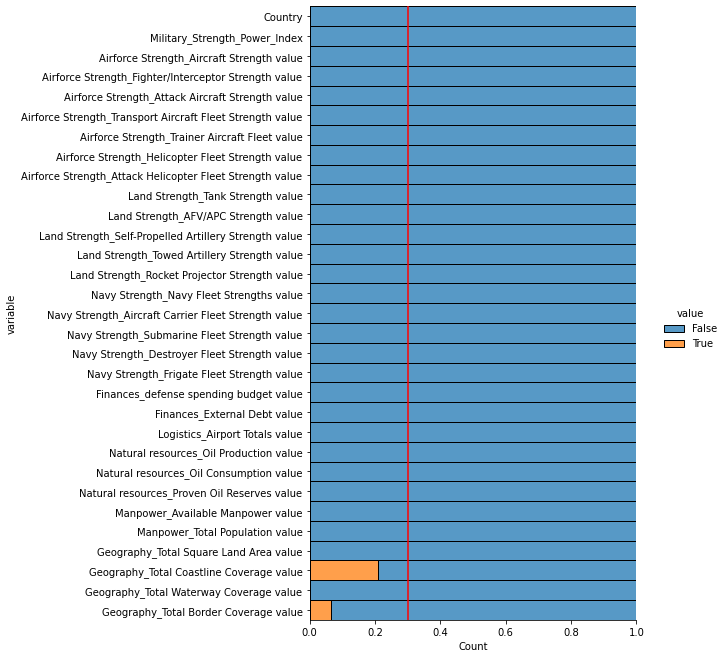

In [52]:
show_null(new_df)

In [53]:
new_df.loc[new_df['Geography_Total Coastline Coverage value'].isnull()]

,Country,Military_Strength_Power_Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength value,Land Strength_Towed Artillery Strength value,Land Strength_Rocket Projector Strength value,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget value,Finances_External Debt value,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,Geography_Total Square Land Area value,Geography_Total Coastline Coverage value,Geography_Total Waterway Coverage value,Geography_Total Border Coverage value
5,Armenia,2.1251,64.0,0.0,9.0,3.0,13.0,37.0,20.0,110.0,748.0,38.0,150.0,68.0,0.0,0.0,0.0,0.0,0.0,"1,38,50,00,000","10,41,00,00,000",11.0,0.0,47500.0,0.0,"16,96,085","30,38,217",29743.0,NaN,0,1570.0
7,Austria,0.9568,120.0,15.0,0.0,11.0,32.0,62.0,0.0,56.0,467.0,33.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"3,38,00,00,000","6,30,80,00,00,000",52.0,14260.0,"2,15,000","4,30,00,000","40,17,691","87,93,370",83871.0,NaN,0,2524.0
11,Belarus,0.8179,202.0,39.0,68.0,4.0,28.0,63.0,21.0,532.0,1560.0,482.0,228.0,238.0,0.0,0.0,0.0,0.0,0.0,"62,37,02,800","39,92,00,00,000",65.0,32000.0,"1,90,000","19,80,00,000","49,82,905","95,27,543","2,07,600",NaN,0,3599.0
13,Bhutan,10.1681,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"2,51,20,000","2,67,10,00,000",2.0,0.0,2000.0,0.0,"1,76,808","7,66,397",38394.0,NaN,0,1136.0
14,Bolivia,0.9942,69.0,0.0,0.0,14.0,23.0,38.0,0.0,54.0,137.0,0.0,86.0,0.0,0.0,0.0,0.0,0.0,0.0,"66,00,00,000","12,81,00,00,000",855.0,59330.0,60000.0,"21,15,00,000","50,75,416","1,13,06,341","10,98,581",NaN,0,7252.0
16,Botswana,2.0582,45.0,10.0,0.0,11.0,8.0,16.0,0.0,55.0,245.0,0.0,30.0,20.0,0.0,0.0,0.0,0.0,0.0,"45,00,00,000","2,18,70,00,000",74.0,0.0,16500.0,0.0,"9,62,617","22,49,104","5,81,730",NaN,0,4347.0
19,Burkina Faso,1.9009,16.0,0.0,3.0,1.0,4.0,8.0,2.0,0.0,350.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"13,00,00,000","3,05,60,00,000",23.0,0.0,10500.0,0.0,"78,00,000","1,97,42,715","2,74,200",NaN,0,3611.0
23,Central African Republic,3.2889,3.0,0.0,0.0,2.0,0.0,1.0,0.0,4.0,55.0,0.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,"2,00,00,000","77,99,00,000",39.0,0.0,4500.0,0.0,"23,48,581","57,45,062","6,22,984",NaN,0,5920.0
24,Chad,1.6383,35.0,0.0,6.0,6.0,4.0,17.0,3.0,60.0,372.0,10.0,51.0,10.0,0.0,0.0,0.0,0.0,0.0,"20,00,00,000","1,72,40,00,000",59.0,"1,28,000","1,00,000","1,50,00,00,000","60,30,834","1,58,33,116","12,84,000",NaN,0,6406.0
30,Czechia,0.5531,95.0,12.0,16.0,8.0,15.0,44.0,15.0,116.0,682.0,86.0,85.0,0.0,0.0,0.0,0.0,0.0,0.0,"2,96,90,00,000","2,05,20,00,00,000",128.0,2000.0,"2,00,000","1,50,00,000","50,11,174","1,06,86,269",78867.0,NaN,0,2046.0


In [55]:
new_df.loc[new_df['Geography_Total Coastline Coverage value'].isnull(),'Geography_Total Coastline Coverage value'] = 0

In [57]:
new_df.loc[new_df['Geography_Total Border Coverage value'].isnull()]

,Country,Military_Strength_Power_Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength value,Land Strength_Towed Artillery Strength value,Land Strength_Rocket Projector Strength value,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget value,Finances_External Debt value,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,Geography_Total Square Land Area value,Geography_Total Coastline Coverage value,Geography_Total Waterway Coverage value,Geography_Total Border Coverage value
6,Australia,0.3225,464.0,82.0,6.0,38.0,174.0,133.0,22.0,59.0,3051.0,0.0,54.0,0.0,48.0,2.0,6.0,2.0,8.0,"26,30,00,00,000","17,14,00,00,00,000",480.0,"2,63,000","10,05,000","1,82,10,00,000","1,08,08,002","2,34,70,145","77,41,220",25760.0,2000.0,NaN
9,Bahrain,1.8547,109.0,17.0,0.0,2.0,37.0,65.0,22.0,180.0,843.0,33.0,26.0,17.0,39.0,0.0,0.0,0.0,1.0,"1,41,50,00,000","52,15,00,00,000",4.0,45000.0,55000.0,"12,46,00,000","8,06,505","14,22,659",760.0,161.0,0.0,NaN
57,Japan,0.1501,1561.0,279.0,12.0,60.0,427.0,637.0,119.0,1004.0,3130.0,238.0,500.0,99.0,155.0,4.0,20.0,40.0,0.0,"49,00,00,00,000","32,40,00,00,00,000",175.0,3841.0,"40,00,000","4,41,20,000","5,38,73,803","12,61,68,156","3,77,915",29751.0,1770.0,NaN
69,Madagascar,3.0869,6.0,0.0,0.0,0.0,0.0,6.0,0.0,12.0,103.0,0.0,25.0,0.0,8.0,0.0,0.0,0.0,0.0,"11,50,00,000","4,08,90,00,000",83.0,0.0,18500.0,0.0,"1,01,45,026","2,56,83,610","5,87,040",4828.0,600.0,NaN
83,New Zealand,1.3684,48.0,0.0,0.0,7.0,13.0,22.0,0.0,0.0,200.0,0.0,24.0,0.0,11.0,0.0,0.0,0.0,2.0,"4,30,00,00,000","91,62,00,00,000",123.0,31480.0,"1,50,000","5,69,00,000","21,15,989","45,45,627","2,67,710",15134.0,0.0,NaN
95,Philippines,0.7852,171.0,0.0,19.0,23.0,24.0,97.0,0.0,7.0,513.0,0.0,286.0,0.0,103.0,0.0,0.0,0.0,2.0,"3,47,00,00,000","76,18,00,00,000",247.0,15000.0,"3,20,000","13,85,00,000","5,18,87,757","10,58,93,381","3,00,000",36289.0,3219.0,NaN
105,Singapore,0.7966,235.0,100.0,0.0,9.0,36.0,77.0,17.0,180.0,3000.0,48.0,77.0,24.0,40.0,0.0,0.0,0.0,6.0,"11,20,00,00,000","5,66,10,00,00,000",9.0,0.0,"13,40,000",0.0,"40,17,314","59,95,991",697.0,193.0,10.0,NaN
113,Sri Lanka,1.4661,77.0,0.0,0.0,15.0,6.0,54.0,9.0,202.0,570.0,0.0,209.0,22.0,40.0,0.0,0.0,0.0,0.0,"2,50,00,00,000","51,72,00,00,000",19.0,0.0,90000.0,0.0,"1,09,27,071","2,25,76,592",65610.0,1340.0,160.0,NaN
119,Taiwan,0.4008,744.0,289.0,0.0,19.0,207.0,210.0,91.0,1180.0,2000.0,482.0,1160.0,115.0,117.0,0.0,4.0,4.0,22.0,"10,72,50,00,000","1,81,90,00,00,000",37.0,196.0,"10,32,000","23,80,000","1,21,96,809","2,35,45,963",35980.0,1566.0,3720.0,NaN


In [58]:
# We assign 0 to these null values as they are just islands.


new_df.loc[new_df['Geography_Total Border Coverage value'].isnull(), 'Geography_Total Border Coverage value'] = 0

<Figure size 288x432 with 0 Axes>

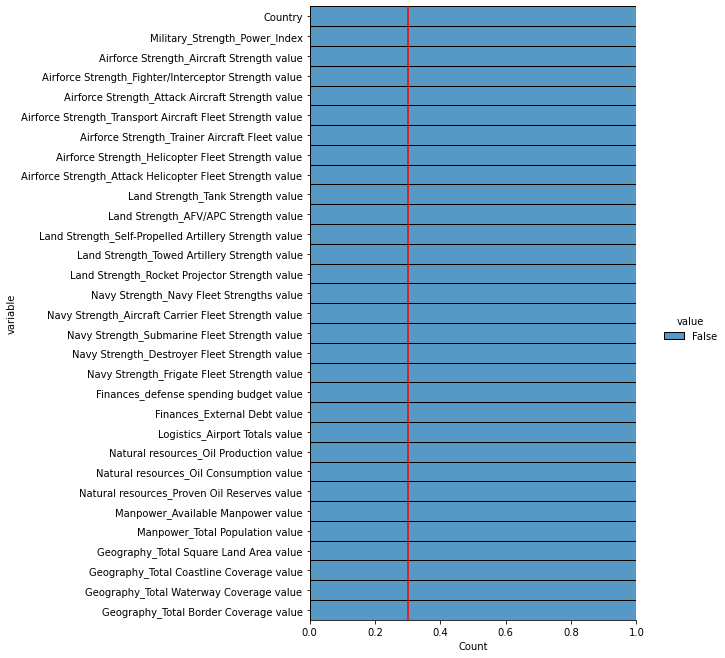

In [59]:
show_null(new_df)

## Fix the dtypes

In [61]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Country                                                    138 non-null    object 
 1   Military_Strength_Power_Index                              138 non-null    float64
 2   Airforce Strength_Aircraft Strength value                  138 non-null    float64
 3   Airforce Strength_Fighter/Interceptor Strength value       138 non-null    float64
 4   Airforce Strength_Attack Aircraft Strength value           138 non-null    float64
 5   Airforce Strength_Transport Aircraft Fleet Strength value  138 non-null    float64
 6   Airforce Strength_Trainer Aircraft Fleet value             138 non-null    float64
 7   Airforce Strength_Helicopter Fleet Strength value          138 non-null    float64
 8   Airforce S

In [60]:
new_df.select_dtypes('object')

,Country,Finances_defense spending budget value,Finances_External Debt value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,Geography_Total Square Land Area value,Geography_Total Coastline Coverage value,Geography_Total Waterway Coverage value
0,Afghanistan,"12,00,00,00,000","2,84,00,00,000",0.0,5500.0,0.0,"1,43,25,743","3,49,40,837","6,52,230",0.0,1200.0
1,Albania,"25,00,00,000","9,50,50,00,000",16000.0,42500.0,"16,83,00,000","15,19,438","30,57,220",28748.0,362.0,41.0
2,Algeria,"13,00,00,00,000","6,26,00,00,000","13,06,000","3,25,000","12,20,00,00,000","2,07,41,263","4,16,57,488","23,81,741",998.0,0.0
3,Angola,"7,00,00,00,000","42,08,00,00,000","16,66,000",82300.0,"8,27,30,00,000","62,44,205","3,03,55,880","12,46,700",1600.0,1300.0
4,Argentina,"4,20,00,00,000","2,14,90,00,00,000","4,79,400","6,85,000","2,18,50,00,000","2,01,79,430","4,46,94,198","27,80,400",4989.0,11000.0
...,...,...,...,...,...,...,...,...,...,...,...
133,Venezuela,"74,50,00,000","1,00,30,00,00,000","20,07,000","5,75,000","3,00,90,00,00,000","1,42,60,129","3,16,89,176","9,12,050",2800.0,7100.0
134,Vietnam,"5,50,00,00,000","96,58,00,00,000","2,71,400","5,25,000","4,40,00,00,000","5,10,43,216","9,70,40,334","3,31,210",3444.0,17702.0
135,Yemen,"1,40,00,00,000","7,06,80,00,000",12260.0,"1,45,000","3,00,00,00,000","1,12,66,221","2,86,67,230","5,27,968",1906.0,0.0
136,Zambia,"4,00,00,000","11,66,00,00,000",0.0,21000.0,0.0,"61,66,905","1,64,45,079","7,52,618",0,0


In [66]:
new_df['Natural resources_Proven Oil Reserves value'].astype('str').str.replace(',','').astype('float')

0      0.000000e+00
1      1.683000e+08
2      1.220000e+10
3      8.273000e+09
4      2.185000e+09
           ...     
133    3.009000e+11
134    4.400000e+09
135    3.000000e+09
136    0.000000e+00
137    0.000000e+00
Name: Natural resources_Proven Oil Reserves value, Length: 138, dtype: float64

In [68]:
for column in new_df.select_dtypes('object').iloc[0:,1:]:
    new_df[column] = new_df[column].astype('str').str.replace(',','').astype('float')

In [69]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 31 columns):
 #   Column                                                     Non-Null Count  Dtype  
---  ------                                                     --------------  -----  
 0   Country                                                    138 non-null    object 
 1   Military_Strength_Power_Index                              138 non-null    float64
 2   Airforce Strength_Aircraft Strength value                  138 non-null    float64
 3   Airforce Strength_Fighter/Interceptor Strength value       138 non-null    float64
 4   Airforce Strength_Attack Aircraft Strength value           138 non-null    float64
 5   Airforce Strength_Transport Aircraft Fleet Strength value  138 non-null    float64
 6   Airforce Strength_Trainer Aircraft Fleet value             138 non-null    float64
 7   Airforce Strength_Helicopter Fleet Strength value          138 non-null    float64
 8   Airforce S

## Drop the features that do not affect military power
* Hint-1,  Georeferences not proper features

In [70]:
new_df.head().T

,0,1,2,3,4
Country,Afghanistan,Albania,Algeria,Angola,Argentina
Military_Strength_Power_Index,1.3444,2.3137,0.4659,0.8379,0.6521
Airforce Strength_Aircraft Strength value,260.0,19.0,551.0,295.0,227.0
Airforce Strength_Fighter/Interceptor Strength value,0.0,0.0,103.0,72.0,24.0
Airforce Strength_Attack Aircraft Strength value,25.0,0.0,22.0,18.0,7.0
Airforce Strength_Transport Aircraft Fleet Strength value,30.0,0.0,59.0,30.0,9.0
Airforce Strength_Trainer Aircraft Fleet value,0.0,0.0,87.0,47.0,64.0
Airforce Strength_Helicopter Fleet Strength value,187.0,19.0,257.0,126.0,100.0
Airforce Strength_Attack Helicopter Fleet Strength value,0.0,0.0,45.0,15.0,0.0
Land Strength_Tank Strength value,0.0,0.0,880.0,379.0,370.0


In [72]:
#Find and list the Geography related columns which have no effect on military power.

drop_cols = new_df.iloc[0:,-4:]
drop_cols

,Geography_Total Square Land Area value,Geography_Total Coastline Coverage value,Geography_Total Waterway Coverage value,Geography_Total Border Coverage value
0,652230.0,0.0,1200.0,5987.0
1,28748.0,362.0,41.0,691.0
2,2381741.0,998.0,0.0,6734.0
3,1246700.0,1600.0,1300.0,5369.0
4,2780400.0,4989.0,11000.0,11968.0
...,...,...,...,...
133,912050.0,2800.0,7100.0,5267.0
134,331210.0,3444.0,17702.0,4616.0
135,527968.0,1906.0,0.0,1601.0
136,752618.0,0.0,0.0,6043.0


In [73]:
new_df.drop(drop_cols,inplace=True,axis=1)

<Figure size 288x432 with 0 Axes>

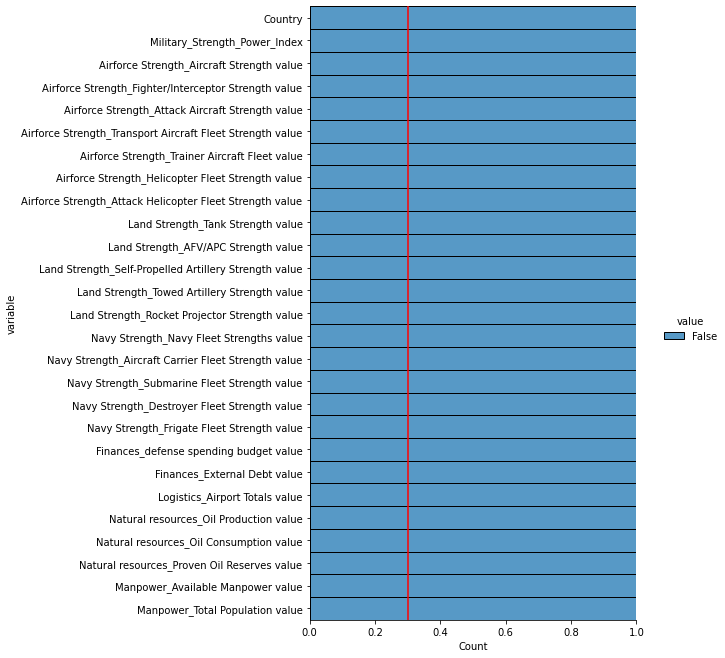

In [74]:
show_null(new_df)

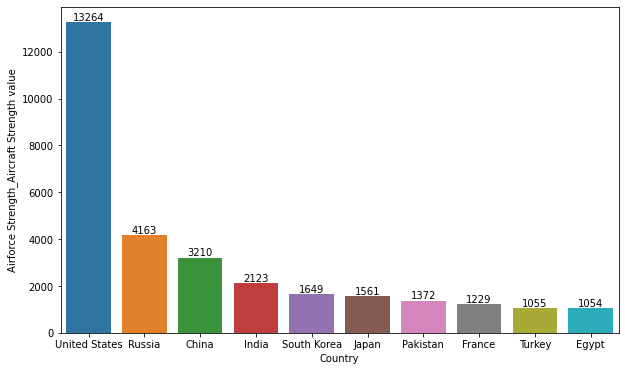

In [109]:
plt.figure(figsize=(10,6))
ax = sns.barplot(new_df[['Country','Airforce Strength_Aircraft Strength value']].sort_values(by='Airforce Strength_Aircraft Strength value', ascending=False).head(10)['Country'],new_df[['Country','Airforce Strength_Aircraft Strength value']].sort_values(by='Airforce Strength_Aircraft Strength value', ascending=False).head(10)['Airforce Strength_Aircraft Strength value'])
ax.bar_label(ax.containers[0]);



## Decriptive statistics

In [115]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [116]:
new_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Military_Strength_Power_Index,138.00,1.46,1.32,0.06,0.57,1.03,2.02,10.17
Airforce Strength_Aircraft Strength value,138.00,388.47,1231.98,0.00,33.00,111.00,290.25,13264.00
Airforce Strength_Fighter/Interceptor Strength value,138.00,81.57,230.32,0.00,0.00,17.00,60.50,2085.00
Airforce Strength_Attack Aircraft Strength value,138.00,25.76,94.53,0.00,0.00,0.00,15.75,742.00
Airforce Strength_Transport Aircraft Fleet Strength value,138.00,30.23,92.33,0.00,3.00,9.00,26.00,945.00
Airforce Strength_Trainer Aircraft Fleet value,138.00,82.83,240.80,0.00,4.25,26.00,79.25,2643.00
Airforce Strength_Helicopter Fleet Strength value,138.00,154.07,520.18,0.00,15.25,44.00,126.75,5768.00
Airforce Strength_Attack Helicopter Fleet Strength value,138.00,25.62,97.33,0.00,0.00,2.00,17.75,967.00
Land Strength_Tank Strength value,138.00,646.57,1515.46,0.00,19.25,153.00,436.25,12950.00
Land Strength_AFV/APC Strength value,138.00,2485.70,5410.55,0.00,250.25,734.50,2000.00,39253.00


<AxesSubplot:>

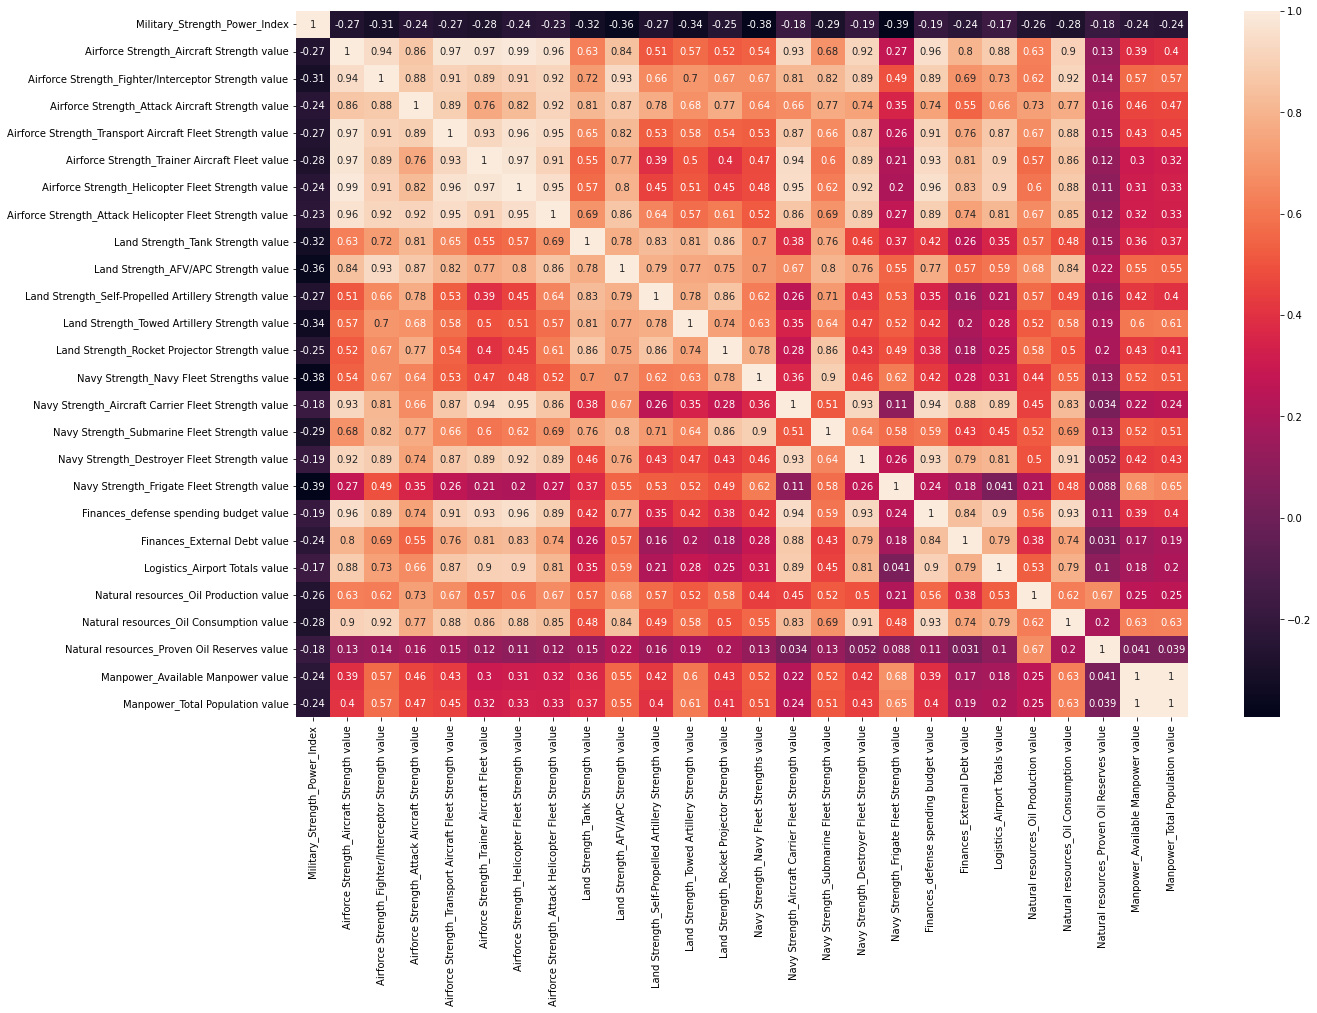

In [120]:
plt.figure(figsize=(20,13))
sns.heatmap(new_df.corr(),annot=True)

# Data Preprocessing

In [121]:
from sklearn.preprocessing import StandardScaler, RobustScaler,MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)


In [125]:
X = new_df.drop(["Country"], axis=1)

In [126]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Modelling

## Hopkins Test 
#### Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express no clusterability, a score tending to 1 express an uniform distrubution so clustering can't be useful and  0 express  not an uniform distrubution hence clusterering can be useful.

In [127]:
from sklearn.cluster import KMeans

In [128]:
from pyclustertend import hopkins

In [129]:
hopkins(X, X.shape[0])

0.07503012797649575

### Elbow Method 
### We use this method to find optimal k value by looking up to break point of graph. 

In [130]:
ssd = [] # sum of squared distance

K = range(2,10)

for k in K:
    model = KMeans(n_clusters=k)
    model.fit(X)
    ssd.append(model.inertia_)

In [131]:
ssd

[1909.3603089782873,
 1294.8401850253222,
 1032.026664153769,
 837.2891408434757,
 730.9562286914653,
 597.1773483722145,
 498.08189403511494,
 436.50368553221074]

Text(0.5, 1.0, 'elbow method')

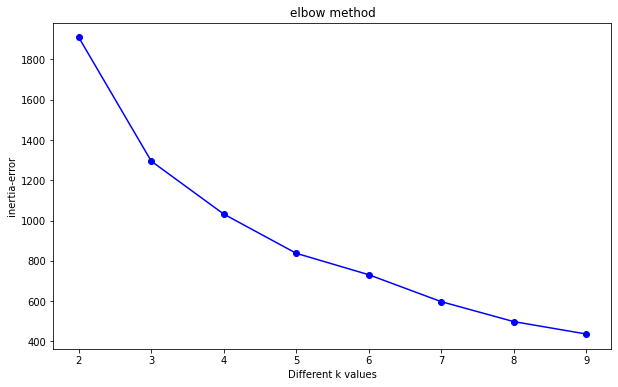

In [132]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method")

In [133]:
pd.Series(ssd).diff()

0       NaN
1   -614.52
2   -262.81
3   -194.74
4   -106.33
5   -133.78
6    -99.10
7    -61.58
dtype: float64

In [134]:
df_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df_diff

,0
1,NaN
2,614.52
3,262.81
4,194.74
5,106.33
6,133.78
7,99.10
8,61.58


<AxesSubplot:>

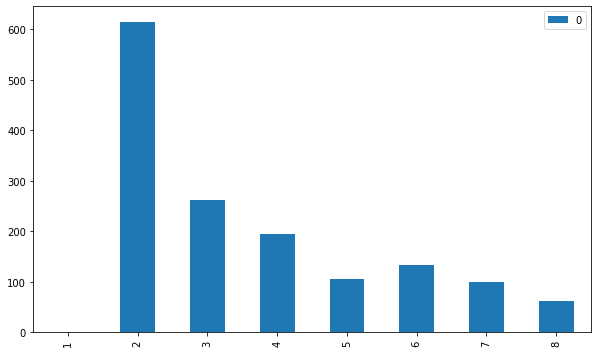

In [135]:
df_diff.plot(kind='bar')


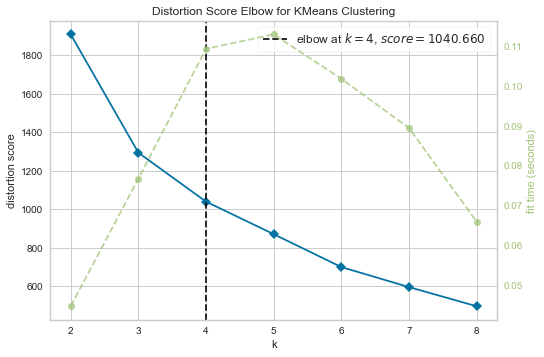

In [141]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=42)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show();

In [137]:
from sklearn.metrics import silhouette_score


In [142]:
silhouette_score(X, model_.labels_)


0.43975025235152876

In [143]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=101)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.864488152936259
For n_clusters=3, the silhouette score is 0.819409076409082
For n_clusters=4, the silhouette score is 0.4956527593898507
For n_clusters=5, the silhouette score is 0.4936624729055128
For n_clusters=6, the silhouette score is 0.48668472171603944
For n_clusters=7, the silhouette score is 0.4863076880767181
For n_clusters=8, the silhouette score is 0.43975025235152876


### Model Building and label visualisation

In [144]:
model = KMeans(n_clusters=4)
model.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [145]:
model.inertia_

1033.7525484140579

In [146]:
model.labels_

array([1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 3, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 2, 1,
       1, 1, 0, 1, 1, 1], dtype=int32)

In [147]:
new_df["cluster"] = model.labels_

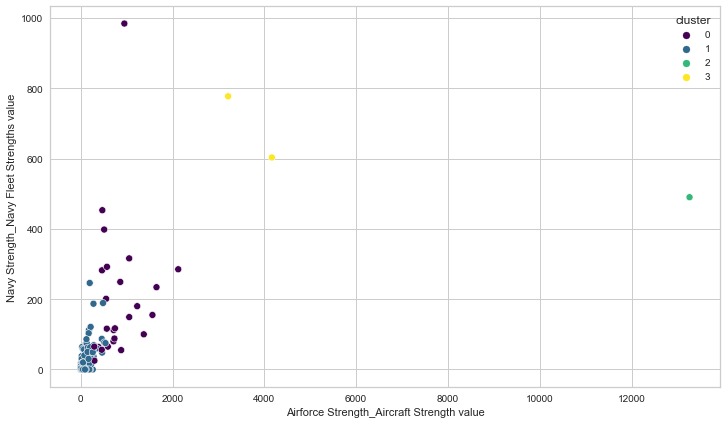

In [149]:
plt.figure(figsize=(12,7))
sns.scatterplot(new_df["Airforce Strength_Aircraft Strength value"], 
                new_df["Navy Strength_Navy Fleet Strengths value"], hue= new_df.cluster,palette= "viridis");

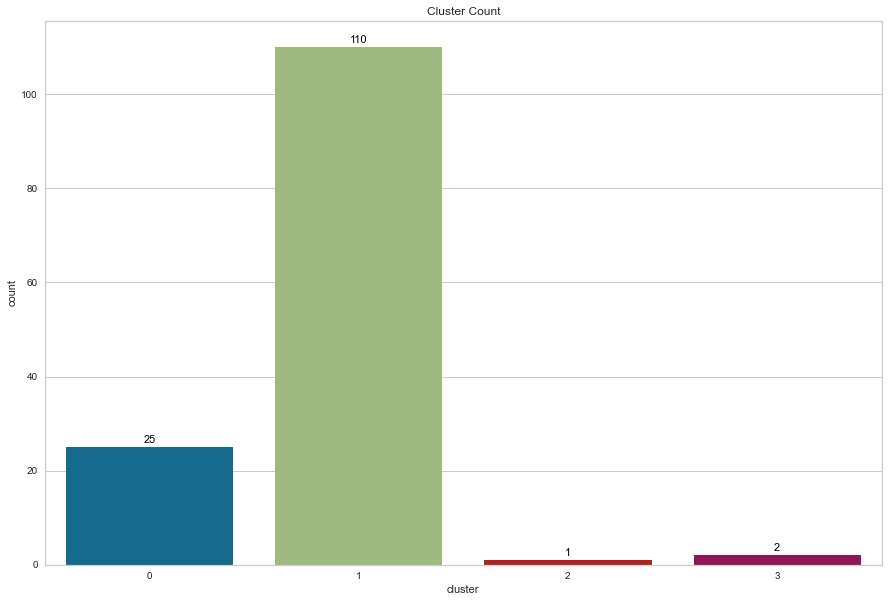

In [151]:
plt.figure(figsize=(15,10))
plt.title("Cluster Count")
ax1 = sns.countplot(x = new_df.cluster)

for p in ax1.patches:
    ax1.annotate(
        s=f"{p.get_height():1.0f}",
        xy=(p.get_x() + p.get_width() / 2., p.get_height()), 
        xycoords='data',
        ha='center', 
        va='center', 
        fontsize=11, 
        color='black',
        xytext=(0,7), 
        textcoords='offset points',
        clip_on=True,                   # <---  important
    )
plt.show();

In [152]:
new_df[new_df["cluster"] == 0]

,Country,Military_Strength_Power_Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength value,Land Strength_Towed Artillery Strength value,Land Strength_Rocket Projector Strength value,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget value,Finances_External Debt value,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,cluster
2,Algeria,0.47,551.00,103.00,22.00,59.00,87.00,257.00,45.00,880.00,7361.00,320.00,240.00,316.00,201.00,0.00,6.00,0.00,5.00,13000000000.00,6260000000.00,157.00,1306000.00,325000.00,12200000000.00,20741263.00,41657488.00,0
17,Brazil,0.20,715.00,43.00,78.00,126.00,198.00,242.00,12.00,437.00,1820.00,132.00,565.00,84.00,112.00,0.00,6.00,0.00,7.00,27800000000.00,547400000000.00,4093.00,2622000.00,3020000.00,13000000000.00,107764996.00,208846892.00,0
22,Canada,0.37,385.00,62.00,0.00,38.00,135.00,145.00,0.00,80.00,1973.00,0.00,133.00,0.00,64.00,0.00,4.00,0.00,12.00,22500000000.00,1608000000000.00,1467.00,3977000.00,2500000.00,169700000000.00,16110865.00,35881659.00,0
27,Colombia,0.60,469.00,21.00,38.00,76.00,80.00,224.00,0.00,0.00,595.00,6.00,110.00,0.00,453.00,0.00,11.00,0.00,4.00,10600000000.00,124600000000.00,836.00,853600.00,300000.00,2002000000.00,24084498.00,48168996.00,0
35,Egypt,0.19,1054.00,215.00,88.00,59.00,387.00,294.00,81.00,4295.00,11700.00,1139.00,2189.00,1084.00,316.00,2.00,8.00,0.00,7.00,11200000000.00,77470000000.00,83.00,589400.00,832000.00,4400000000.00,42946553.00,99413317.00,0
40,France,0.17,1229.00,269.00,0.00,121.00,187.00,589.00,62.00,528.00,6028.00,109.00,12.00,13.00,180.00,4.00,9.00,11.00,11.00,41500000000.00,5360000000000.00,464.00,15170.00,1600000.00,72350000.00,30111868.00,67364357.00,0
43,Germany,0.22,712.00,128.00,74.00,71.00,26.00,386.00,56.00,245.00,4583.00,108.00,0.00,38.00,80.00,0.00,6.00,0.00,9.00,50000000000.00,5326000000000.00,539.00,43410.00,2500000.00,145400000.00,37010559.00,80457737.00,0
45,Greece,0.53,566.00,187.00,0.00,15.00,143.00,231.00,29.00,1355.00,3691.00,547.00,463.00,152.00,116.00,0.00,11.00,0.00,13.00,4844000000.00,506600000000.00,77.00,2753.00,350000.00,10000000.00,4993347.00,10761523.00,0
49,India,0.10,2123.00,538.00,172.00,250.00,359.00,722.00,23.00,4292.00,8686.00,235.00,4060.00,266.00,285.00,1.00,16.00,10.00,13.00,61000000000.00,501600000000.00,346.00,733900.00,5000000.00,4621000000.00,622480340.00,1296834042.00,0
50,Indonesia,0.25,462.00,41.00,39.00,54.00,109.00,177.00,16.00,313.00,1178.00,153.00,366.00,36.00,282.00,0.00,5.00,0.00,7.00,7600000000.00,344400000000.00,673.00,801700.00,1630000.00,3230000000.00,130868127.00,262787403.00,0


In [153]:
new_df[new_df["cluster"] == 1]

,Country,Military_Strength_Power_Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength value,Land Strength_Towed Artillery Strength value,Land Strength_Rocket Projector Strength value,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget value,Finances_External Debt value,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,cluster
0,Afghanistan,1.34,260.00,0.00,25.00,30.00,0.00,187.00,0.00,0.00,1062.00,0.00,176.00,50.00,0.00,0.00,0.00,0.00,0.00,12000000000.00,2840000000.00,43.00,0.00,5500.00,0.00,14325743.00,34940837.00,1
1,Albania,2.31,19.00,0.00,0.00,0.00,0.00,19.00,0.00,0.00,467.00,0.00,0.00,0.00,38.00,0.00,0.00,0.00,0.00,250000000.00,9505000000.00,4.00,16000.00,42500.00,168300000.00,1519438.00,3057220.00,1
3,Angola,0.84,295.00,72.00,18.00,30.00,47.00,126.00,15.00,379.00,595.00,28.00,357.00,115.00,57.00,0.00,0.00,0.00,0.00,7000000000.00,42080000000.00,176.00,1666000.00,82300.00,8273000000.00,6244205.00,30355880.00,1
4,Argentina,0.65,227.00,24.00,7.00,9.00,64.00,100.00,0.00,370.00,739.00,83.00,172.00,26.00,49.00,0.00,2.00,4.00,0.00,4200000000.00,214900000000.00,1138.00,479400.00,685000.00,2185000000.00,20179430.00,44694198.00,1
5,Armenia,2.13,64.00,0.00,9.00,3.00,13.00,37.00,20.00,110.00,748.00,38.00,150.00,68.00,0.00,0.00,0.00,0.00,0.00,1385000000.00,10410000000.00,11.00,0.00,47500.00,0.00,1696085.00,3038217.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,Uzbekistan,0.81,185.00,66.00,20.00,18.00,2.00,79.00,25.00,420.00,1215.00,137.00,0.00,98.00,0.00,0.00,0.00,0.00,0.00,975000000.00,16900000000.00,53.00,46070.00,142000.00,594000000.00,15912566.00,30023709.00,1
133,Venezuela,0.64,260.00,38.00,0.00,52.00,82.00,86.00,10.00,390.00,600.00,73.00,104.00,36.00,49.00,0.00,2.00,0.00,4.00,745000000.00,100300000000.00,444.00,2007000.00,575000.00,300900000000.00,14260129.00,31689176.00,1
135,Yemen,1.24,169.00,77.00,0.00,8.00,21.00,61.00,14.00,620.00,615.00,20.00,85.00,150.00,30.00,0.00,0.00,0.00,0.00,1400000000.00,7068000000.00,57.00,12260.00,145000.00,3000000000.00,11266221.00,28667230.00,1
136,Zambia,1.65,108.00,18.00,0.00,11.00,52.00,27.00,0.00,75.00,184.00,0.00,42.00,50.00,0.00,0.00,0.00,0.00,0.00,40000000.00,11660000000.00,88.00,0.00,21000.00,0.00,6166905.00,16445079.00,1


In [154]:
new_df[new_df["cluster"] == 2]

,Country,Military_Strength_Power_Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength value,Land Strength_Towed Artillery Strength value,Land Strength_Rocket Projector Strength value,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget value,Finances_External Debt value,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,cluster
130,United States,0.06,13264.00,2085.00,715.00,945.00,2643.00,5768.00,967.00,6289.00,39253.00,1465.00,2740.00,1366.00,490.00,20.00,66.00,91.00,0.00,750000000000.00,17910000000000.00,13513.00,9352000.00,20000000.00,36520000000.00,144872845.00,329256465.00,2


In [155]:
new_df[new_df["cluster"] == 3]

,Country,Military_Strength_Power_Index,Airforce Strength_Aircraft Strength value,Airforce Strength_Fighter/Interceptor Strength value,Airforce Strength_Attack Aircraft Strength value,Airforce Strength_Transport Aircraft Fleet Strength value,Airforce Strength_Trainer Aircraft Fleet value,Airforce Strength_Helicopter Fleet Strength value,Airforce Strength_Attack Helicopter Fleet Strength value,Land Strength_Tank Strength value,Land Strength_AFV/APC Strength value,Land Strength_Self-Propelled Artillery Strength value,Land Strength_Towed Artillery Strength value,Land Strength_Rocket Projector Strength value,Navy Strength_Navy Fleet Strengths value,Navy Strength_Aircraft Carrier Fleet Strength value,Navy Strength_Submarine Fleet Strength value,Navy Strength_Destroyer Fleet Strength value,Navy Strength_Frigate Fleet Strength value,Finances_defense spending budget value,Finances_External Debt value,Logistics_Airport Totals value,Natural resources_Oil Production value,Natural resources_Oil Consumption value,Natural resources_Proven Oil Reserves value,Manpower_Available Manpower value,Manpower_Total Population value,cluster
26,China,0.07,3210.00,1232.00,371.00,224.00,314.00,911.00,281.00,3500.00,33000.00,3800.00,3600.00,2650.00,777.00,2.00,74.00,36.00,52.00,237000000000.00,1598000000000.00,507.00,3838000.00,13500000.00,25620000000.00,752855402.00,1384688986.00,3
101,Russia,0.07,4163.00,873.00,742.00,424.00,497.00,1522.00,531.00,12950.00,27038.00,6083.00,4465.00,3860.00,603.00,1.00,62.00,16.00,10.00,48000000000.00,539600000000.00,1218.00,10580000.00,3225000.00,80000000000.00,69640160.00,142122776.00,3


### Evaluate 

In [156]:
from sklearn.metrics import silhouette_score

In [157]:
print(f'Silhouette Score(n=4): {silhouette_score(X, new_df.cluster)}') # towards to 1 means, data good clustered by model

Silhouette Score(n=4): 0.514808916458825


In [158]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

For n_clusters=2, the silhouette score is 0.864488152936259
For n_clusters=3, the silhouette score is 0.819409076409082
For n_clusters=4, the silhouette score is 0.6148304281961483
For n_clusters=5, the silhouette score is 0.4936624729055128
For n_clusters=6, the silhouette score is 0.48668472171603944
For n_clusters=7, the silhouette score is 0.4863076880767181
For n_clusters=8, the silhouette score is 0.43975025235152876


In [168]:
den = pd.DataFrame(X,columns=new_df.drop(["Country","cluster"],axis=1).columns)
den["cluster"] = new_df["cluster"]


In [169]:
clus_pred = den.groupby("cluster").mean().T
clus_pred

cluster,0,1,2,3
Military_Strength_Power_Index,-0.87,0.23,-1.06,-1.06
Airforce Strength_Aircraft Strength value,0.36,-0.23,10.49,2.69
Airforce Strength_Fighter/Interceptor Strength value,0.50,-0.27,8.73,4.23
Airforce Strength_Attack Aircraft Strength value,0.20,-0.21,7.32,5.64
Airforce Strength_Transport Aircraft Fleet Strength value,0.30,-0.22,9.94,3.19
Airforce Strength_Trainer Aircraft Fleet value,0.46,-0.23,10.67,1.34
Airforce Strength_Helicopter Fleet Strength value,0.32,-0.21,10.83,2.05
Airforce Strength_Attack Helicopter Fleet Strength value,0.20,-0.20,9.71,3.92
Land Strength_Tank Strength value,0.74,-0.29,3.74,5.02
Land Strength_AFV/APC Strength value,0.66,-0.31,6.82,5.11


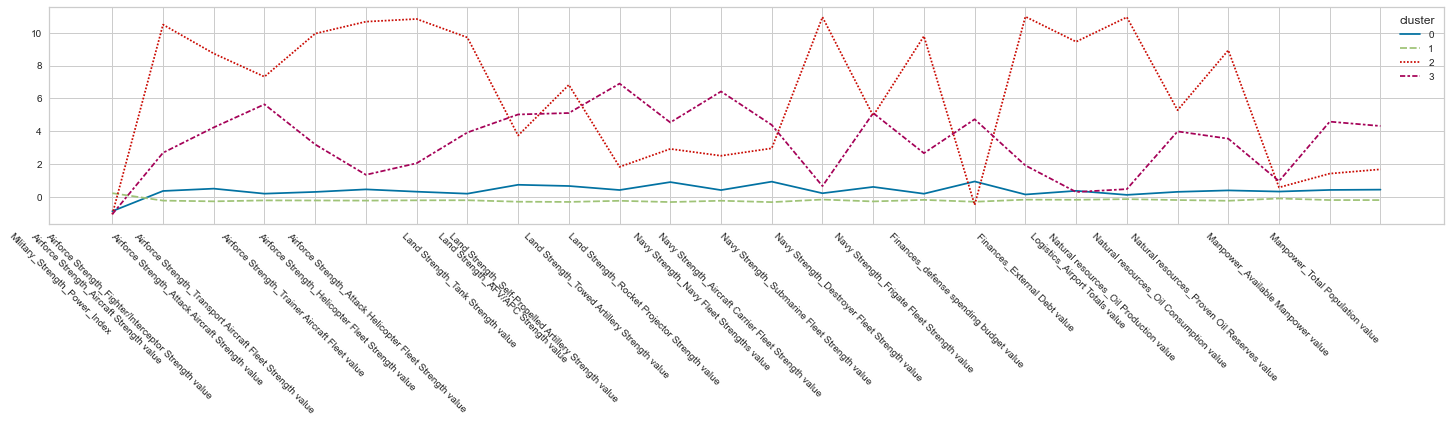

In [195]:
# plt.plot(clus_pred)
plt.figure(figsize=(25,4))
sns.lineplot(data=clus_pred)
plt.xticks(rotation=-45, ha='right');

## Hierarchical Clustering

In [197]:
from scipy.cluster.hierarchy import dendrogram, linkage

### Dendogram

In [198]:
hc_ward = linkage(y = X, method = "ward")
hc_complete = linkage(X, "complete")
hc_average = linkage(X, "average")
hc_single = linkage(X, "single")

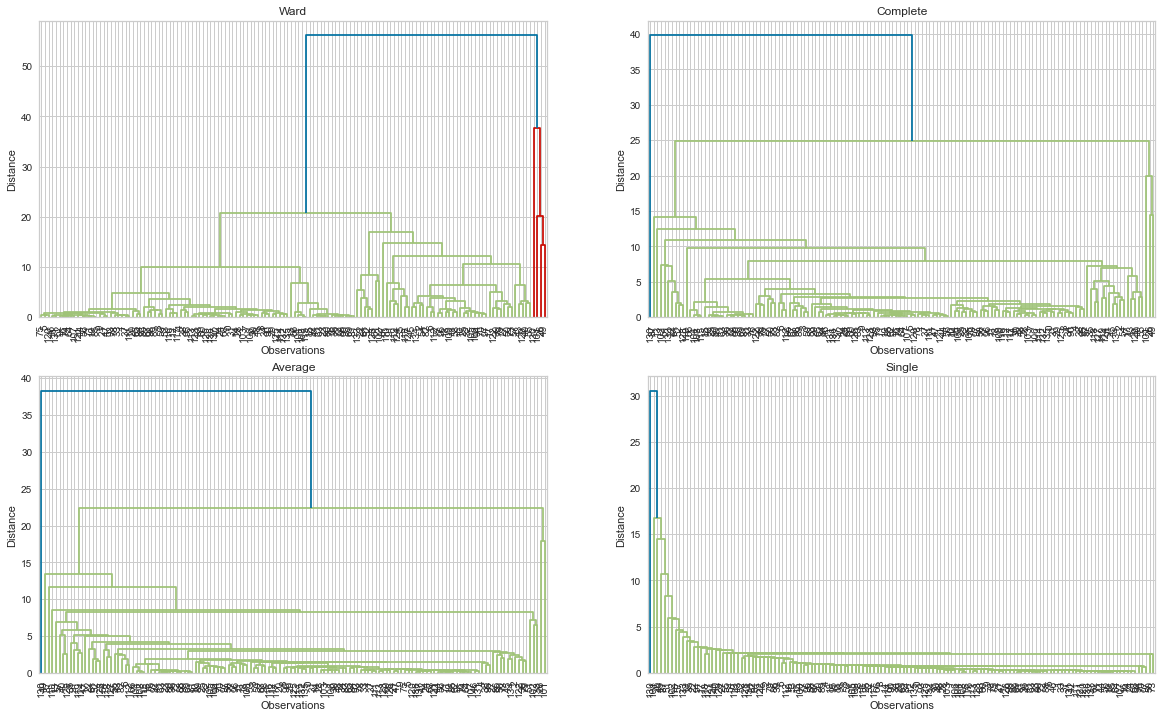

In [199]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

### Model Building

In [200]:
from sklearn.cluster import AgglomerativeClustering

### Evaluate 

In [201]:
model1 = AgglomerativeClustering(n_clusters=4, affinity = "euclidean", linkage = "ward")
model1.fit_predict(X)

array([3, 3, 1, 3, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3,
       1, 3, 3, 1, 0, 1, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 1,
       3, 1, 3, 3, 3, 0, 1, 1, 1, 3, 1, 1, 3, 1, 1, 3, 3, 1, 3, 3, 3, 3,
       3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 1, 3, 1, 3, 3, 1, 3, 3, 3, 3, 1,
       3, 3, 3, 1, 3, 3, 1, 3, 1, 1, 3, 3, 1, 0, 1, 3, 3, 1, 3, 3, 3, 1,
       1, 3, 1, 3, 3, 3, 3, 3, 1, 1, 3, 3, 1, 3, 1, 3, 3, 1, 1, 1, 2, 3,
       3, 1, 1, 3, 3, 3])

In [203]:
new_df["cluster_1"] = model1.labels_